<a href="https://colab.research.google.com/github/sahanal2603/Data-Science-and-Analytics/blob/master/Session_20_Pandas_Introduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas Tutorial**


# This content is taken directly from the Tutorial session of the TEQIP III sponsored Faculty Development program, conducted by IIT Ghandinagar, during 11 to 23 January, 2021

## **1. Getting and Knowing Your Data**

In [ ]:
#Import the necessary libraries

import pandas as pd
import numpy as np

In [ ]:
#This time we are going to pull the "Occupation" dataset directly from the internet. 
#Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

#Import the dataset from this address: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
#Assign it to a variable called users and use the 'user_id' as index

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [ ]:
#See the first 25 entries
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [ ]:
#See the last 10 entries

users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


In [ ]:
#What is the number of observations in the dataset?

users.shape[0]

943

In [ ]:
#What is the number of columns in the dataset?

users.shape[1]

4

In [ ]:
#Print the name of all the columns.

users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [ ]:
#What is the data type of each column?

users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [ ]:
#Print only the occupation column

users.occupation

#or

users['occupation']

user_id
929        scientist
930        scientist
931         educator
932         educator
933          student
934         engineer
935           doctor
936            other
937         educator
938       technician
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, dtype: object

In [ ]:
users.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
A=users.occupation.nunique()
print(A)

21


In [ ]:
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [ ]:
users.gender.nunique()

2

In [ ]:
users.gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
users.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

In [ ]:
#How many different occupations are in this dataset?

users.occupation.unique()
#or by using value_counts() which returns the count of unique elements
#users.occupation.value_counts().count()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
#What is the most frequent occupation?

#Because "most" is asked
users.occupation.value_counts().head(1).index[0]

#or
#to have the top 5

users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [ ]:
#Summarize the DataFrame.

users.describe() #Notice: by default, only the numeric columns are returned.

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [ ]:
#Summarize all the columns

users.describe(include = "all") #Notice: By default, only the numeric columns are returned.

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [ ]:
#Summarize only the occupation column

users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

In [ ]:
users.age.head()

user_id
1    24
2    53
3    23
4    24
5    33
Name: age, dtype: int64

In [ ]:
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
      ..
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

In [ ]:
users.age.value_counts().head(10)

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
Name: age, dtype: int64

In [ ]:
users.age.value_counts().tail(10)

58    3
64    2
68    2
69    2
62    2
11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

In [ ]:
#What is the mean age of users?

round(users.age.mean())

34

In [ ]:
#What is the age with least occurrence?

users.age.value_counts().tail() #7, 10, 11, 66 and 73 years -> only 1 occurrence

11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

## **2. Grouping**

In [ ]:
users.groupby('occupation')

In [ ]:
users.groupby('occupation').describe()

age                                                      
               count       mean        std   min    25%   50%    75%   max
occupation                                                                
administrator   79.0  38.746835  11.123397  21.0  30.00  37.0  48.00  70.0
artist          28.0  31.392857   8.668116  19.0  25.00  30.0  39.00  48.0
doctor           7.0  43.571429  12.501428  28.0  35.50  45.0  48.50  64.0
educator        95.0  42.010526  10.413264  23.0  33.00  42.0  50.00  63.0
engineer        67.0  36.388060  11.199236  22.0  28.00  36.0  43.00  70.0
entertainment   18.0  29.222222  10.056052  15.0  23.00  25.0  33.00  50.0
executive       32.0  38.718750  10.608075  22.0  31.00  38.5  46.00  69.0
healthcare      16.0  41.562500  11.313524  22.0  30.50  44.5  49.25  62.0
homemaker        7.0  32.571429  10.737119  20.0  24.50  32.0  38.50  50.0
lawyer          12.0  36.750000  10.830303  21.0  28.75  34.0  47.75  53.0
librarian       51.0  40.000000  11.023611  23.0  30.00  39.0  49.00  69.0
marketing       26.0  37.615385   9.474500  24.0  30.25  36.0  42.50  55.0
none             9.0  26.555556  13.757826  11.0  16.00  26.0  33.00  55.0
other          105.0  34.523810  10.738227  13.0  26.00  32.0  44.00  64.0
programmer      66.0  33.121212   9.624512  20.0  27.00  30.0  38.00  63.0
retired         14.0  63.071429   5.757461  51.0  60.00  63.0  67.25  73.0
salesman        12.0  35.666667  14.079859  18.0  28.25  34.0  38.25  66.0
scientist       31.0  35.548387   7.392964  23.0  30.00  37.0  40.00  55.0
student        196.0  22.081633   5.284081   7.0  19.00  21.0  25.00  42.0
technician      27.0  33.148148   9.867210  21.0  24.00  30.0  40.00  55.0
writer          45.0  36.311111  11.423306  18.0  26.00  36.0  48.00  60.0

In [ ]:
#Discover what is the mean age per occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [ ]:
#Discover the Male ratio per occupation and sort it from the most to the least

# create a function
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)


a = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100 

# sort to the most male 
a.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [ ]:
#For each occupation, calculate the minimum and maximum ages

users.groupby('occupation').age.agg(['min', 'max', 'std', 'var'])

,min,max,std,var
occupation,,,,
administrator,21,70,11.123397,123.729958
artist,19,48,8.668116,75.136243
doctor,28,64,12.501428,156.285714
educator,23,63,10.413264,108.436058
engineer,22,70,11.199236,125.422886
entertainment,15,50,10.056052,101.124183
executive,22,69,10.608075,112.531250
healthcare,22,62,11.313524,127.995833
homemaker,20,50,10.737119,115.285714


## **5. Merge**

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np

#The following exercise utilizes data from UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
#Import the first dataset cars1 and cars2.
#Assign each to a to a variable called cars1 and cars2

cars1 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv")
cars2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv")

print(cars1.head())
print(cars2.head())

    mpg  cylinders  displacement  ... Unnamed: 11  Unnamed: 12  Unnamed: 13
0  18.0          8           307  ...         NaN          NaN          NaN
1  15.0          8           350  ...         NaN          NaN          NaN
2  18.0          8           318  ...         NaN          NaN          NaN
3  16.0          8           304  ...         NaN          NaN          NaN
4  17.0          8           302  ...         NaN          NaN          NaN

[5 rows x 14 columns]
    mpg  cylinders  displacement  ... model  origin                 car
0  33.0          4            91  ...    76       3         honda civic
1  20.0          6           225  ...    76       1      dodge aspen se
2  18.0          6           250  ...    76       1   ford granada ghia
3  18.5          6           250  ...    76       1  pontiac ventura sj
4  17.5          6           258  ...    76       1       amc pacer d/l

[5 rows x 9 columns]


In [ ]:
#Oops, it seems our first dataset has some unnamed blank columns, fix cars1
cars1 = cars1.loc[:, "mpg":"car"]
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


In [ ]:
#What is the number of observations in each dataset?
print(cars1.shape)
print(cars2.shape)

(198, 9)
(200, 9)


In [ ]:
#Join cars1 and cars2 into a single DataFrame called cars
cars = cars1.append(cars2)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


## **6. Stats**

In [ ]:
#We are going to use a subset of US Baby Names (https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.
#In the file it will be names from 2004 until 2014

#Import the dataset from this address: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv
#Assign it to a variable called baby_names.

baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [ ]:
#See the first 10 entries
baby_names.head(10)
baby_names.Name.nunique()
aa=baby_names.groupby('Name').sum()
print(aa)
#del baby_names['Id']
#del baby_names['Year']
baby_names.head()

         Unnamed: 0  Count
Name                      
Aaban       7733801     12
Aadan       7158061     23
Aadarsh     1728030      5
Aaden     555052029   3426
Aadhav       709606      6
...             ...    ...
Zyra       17538998     42
Zyrah       5487073     11
Zyren       5074229      6
Zyria      29787029     59
Zyriah     34146196     58

[17632 rows x 2 columns]


,Unnamed: 0,Name,Gender,State,Count
0,11349,Emma,F,AK,62
1,11350,Madison,F,AK,48
2,11351,Hannah,F,AK,46
3,11352,Grace,F,AK,44
4,11353,Emily,F,AK,41


In [ ]:
#Delete the column 'Unnamed: 0' and 'Id'

# deletes Unnamed: 0
del baby_names['Unnamed: 0']

# deletes Unnamed: 0
del baby_names['Id']

baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [ ]:
#Are there more male or female names in the dataset?

baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [ ]:
#Group the dataset by name and assign to names

# you don't want to sum the Year column, so you delete it
del baby_names["Year"]

# group the data
names = baby_names.groupby("Name").sum()


In [ ]:
#What is the median name occurrence?

names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
...,...
Sriram,49
Trinton,49
Vita,49


In [ ]:
#What is the standard deviation of names?

names.Count.std()

11006.069467891111

In [ ]:
#Get a summary with the mean, min, max, std and quartiles.

names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


## **7. Visualization**

In [ ]:
#This exercise was created based on the tutorial and documentation from Seaborn
#The dataset being used is tips from Seaborn.

#Import the necessary libraries
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
% matplotlib inline

# set seaborn style to white
sns.set_style("white")

In [ ]:
#Import the dataset from this address: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv
#Assign it to a variable called tips

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#Delete the Unnamed 0 column
del tips['Unnamed: 0']

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


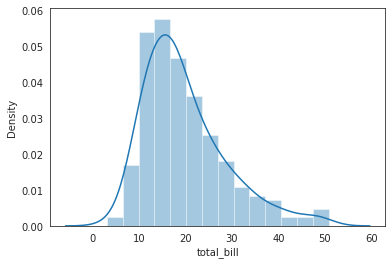

In [ ]:
#Plot the total_bill column histogram

# create histogram
sns.distplot(tips.total_bill);

# set lables and titles
#sns.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

# take out the right and upper borders
#sns.despine()

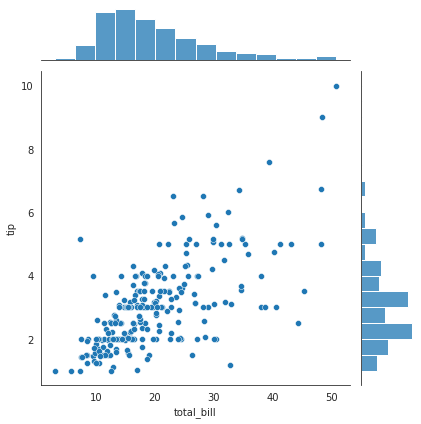

In [ ]:
#Create a scatter plot presenting the relationship between total_bill and tip

sns.jointplot(x ="total_bill", y ="tip", data = tips)

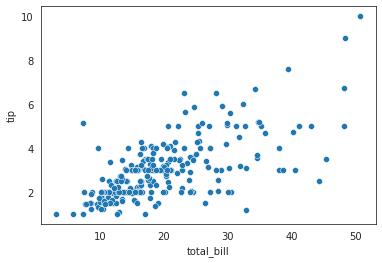

In [ ]:
#Create a scatter plot presenting the relationship between total_bill and tip

sns.scatterplot(x ="total_bill", y ="tip", data = tips)

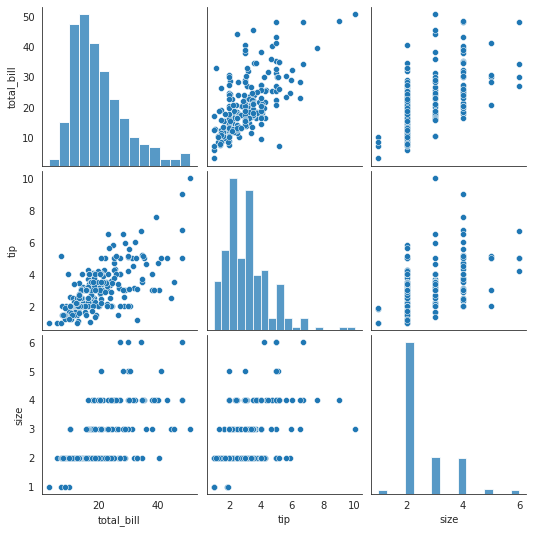

In [ ]:
#Create one image with the relationship of total_bill, tip and size.

sns.pairplot(tips)

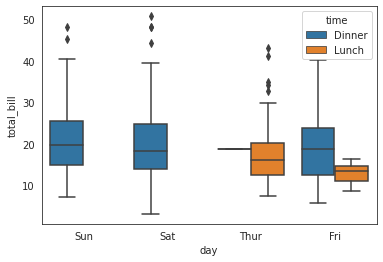

In [ ]:
#Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

## **8. Time Series**

In [ ]:
#We are going to use Apple's stock price.
#Import the dataset from this address: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv
#Assign it to a variable apple

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [ ]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [ ]:
#Transform the Date column as a datetime type

apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [ ]:
#Set the date as the index

apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [ ]:
#Is there any duplicate dates?

# NO! All are unique
apple.index.is_unique

True

In [ ]:
#Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [ ]:
#Get the last business day of each month

apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


## **9. Deleting**

In [ ]:
#This exercise is a adaptation from the UCI Wine dataset. The only pupose is to practice deleting data with pandas.
#Import the dataset from this address: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
#Assign it to a variable called wine.

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
#Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [ ]:
#Assign the columns as below:
#The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):
#1) alcohol
#2) malic_acid
#3) alcalinity_of_ash
#4) magnesium
#5) flavanoids
#6) proanthocyanins
#7) hue

wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [ ]:
#Set the values of the first 3 rows from alcohol as NaN

wine.iloc[0:3, 0] = np.nan
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,NaN,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,NaN,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,NaN,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1.0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1.0,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
#Count the number of missing values

wine.isnull().sum()

1        3
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [ ]:
#Delete the rows that contain missing values

wine = wine.dropna(axis = 0, how = "any")
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
3,1.0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1.0,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1.0,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1.0,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1.0,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
